## Saheed Adisa Ganiyu

In [1]:
#importing all the necessary packages
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
from numpy.linalg import inv

### Problem 19.1)
Consider the function $M_2(x, y)=x^2+y^2$. Minimize and maximize it subject to the condition $(6 x+29)^2(x-1)^2+12(6 x+31)(x-1) y^2+36 y^4=0$.


Following
$$
f_t(\boldsymbol{x}):=f(\boldsymbol{x})+t \sum_{i=1}^{n_{\mathrm{eq}}} h_i^2(\boldsymbol{x})
$$

#### Newton Method
Damped Newton method: $\boldsymbol{x} \longmapsto \boldsymbol{x}-t\left(\nabla^2 f\right)^{-1} \nabla f$, where $t$ is obtained from line search.

In [2]:
# Damped newton adapted to the case of Barrier approach
def damped_newton1(f, df, Hf, x0, sign_min_max = 1, tee=50, a=0.25, b=0.5, st=1000):
    """
    Damped newton method for finding optimum values
    """
    t=1; alpha=a; beta=b
    x=x0; x_tab=np.copy(x)
    F=f; dF=df; HF=Hf
    stop=st; counter2=0
    T =tee; eps=np.finfo(float).eps
    while (T< 2e+5):
        counter2=0
        # Stoping criterial
        while (((LA.norm(df(x,T,sign_min_max)))>= 1e-8) and counter2 < stop):
            # Picking direction: gradient descent
            dx = -np.linalg.solve(HF(x,T,sign_min_max),dF(x,T,sign_min_max))   #(np.matmul((inv(HF(x))),dF(x)))
            if np.dot(dx,dF(x,T,sign_min_max))>0:
                dx=-dx
            flag = 0
            # Line search : backtracking
            while (F(x+t*dx,T,sign_min_max)[0]>= (F(x,T,sign_min_max)[0]+alpha*t*np.dot(dF(x,T,sign_min_max),dx))):#\
                   # and (LA.norm(dx)>eps):
                t =t*beta
                if (LA.norm(t*dx)< np.finfo(float).eps):
                    if (flag==1):
                        break
                    dx = -dF(x,T,sign_min_max); flag=1
            # Update x
            x = x + t*dx
            x_tab = np.vstack((x_tab,x))
            counter2 +=1
        T = 10*T
    print("x_opt =",x,"\t", "f(opt) =",F(x,T)[1],"\t no_iter =",counter2)
    return x, x_tab

#### Gradient Method
Gradient method with backtacking: $\boldsymbol{x} \longmapsto \boldsymbol{x}-t \nabla f$, where $t$ is obtained from line search.

In [3]:
# This is the gradient method adapted to the case of 
# equality constrainst using Barrier approach
def gradient1(f, df, x0, tee=10, sign_min_max=1, alpha = 0.1, beta = 0.5, st=1000 ):
    """
    Grdient Descent Metthod with Backtracking
    """
    T=tee; t=1; x=x0; x_tab=np.copy(x0)
    F = f; dF =df;counter = 0
    while (T<1e+10):
        counter = 0
        while ((LA.norm(dF(x,T,sign_min_max)))>= 1e-8) and (counter< st): # Stoping criterial
            # Picking direction: gradient descent
            dx = -dF(x,T,sign_min_max)
            if np.dot(dx,dF(x,T,sign_min_max))>0:
                dx=-dx
            # Line search : backtracking
            while (F(x+t*dx,T,sign_min_max)[0])>= (F(x,T,sign_min_max)[0]+alpha*t*np.matmul(dF(x,T,sign_min_max),dx)):
                t =t*beta
            # Update x
            x = x + t*dx
            x_tab = np.vstack((x_tab,x))
            counter +=1
        T = 10*T
    print("x_min =",x,"\t", "f(x_min) =",F(x,T)[1],"\t no_iter =",counter)
    return x, x_tab

In [4]:
##### Function definition
def M(X,T,sign_min_max=1):
    x = X[0]
    y = X[1]
    m = x**2+y**2
    h = (6*x+29)**2*(x-1)**2+12*(6*x+31)*(x-1)*y**2+36*y**4
    func1 = sign_min_max*m +T*(h)**2
    return func1, m,h

def dM(X,T,sign_min_max=1): 
    x = X[0]
    y = X[1]
    Mx =4*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2 + 36*y**4)*((6*x + 29)**2*(x - 1)\
        + 6*(6*x + 29)*(x - 1)**2 + 6*(6*x + 31)*y**2 + 36*(x - 1)*y**2)*T + (sign_min_max*2*x)
    My = 48*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2 + 36*y**4)*((6*x + 31)*(x - 1)*y\
        + 6*y**3)*T + (sign_min_max*2*y)
    g_func = np.array([Mx,My])
    return g_func

# def dM2(X,T,sign_min_max=1): #for maximum
#         x = X[0]
#         y = X[1]
#         Mx = 4*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2 + 36*y**4)*((6*x + 29)**2*(x - 1)\
#             + 6*(6*x + 29)*(x - 1)**2 + 6*(6*x + 31)*y**2 + 36*(x - 1)*y**2)*T - 2*x
#         My = 48*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2 + 36*y**4)*((6*x + 31)*(x - 1)*y\
#             + 6*y**3)*T - 2*y
#         g_func = np.array([Mx,My])
#         return g_func

def HM(X,T,sign_min_max=1):
    x = X[0]
    y = X[1]
    Mxx = 8*((6*x + 29)**2*(x - 1) + 6*(6*x + 29)*(x - 1)**2 + 6*(6*x + 31)*y**2 + 36*(x - 1)*y**2)**2*T\
        + 4*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2 + 36*y**4)*((6*x + 29)**2\
        + 24*(6*x + 29)*(x - 1) + 36*(x - 1)**2 + 72*y**2)*T + (sign_min_max*2)
    Mxy = 96*((6*x + 29)**2*(x - 1) + 6*(6*x + 29)*(x - 1)**2 + 6*(6*x + 31)*y**2 + 36*(x - 1)*y**2)*((6*x + 31)*(x - 1)*y\
        + 6*y**3)*T + 48*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2 + 36*y**4)*((6*x + 31)*y + 6*(x - 1)*y)*T
    Myy = 1152*((6*x + 31)*(x - 1)*y + 6*y**3)**2*T + 48*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2\
        + 36*y**4)*((6*x + 31)*(x - 1) + 18*y**2)*T + (sign_min_max*2)
    H_func = np.array([[Mxx, Mxy],[Mxy, Myy]])
    return H_func

# def HM2(X,T,sign_min_max=1): #for maximu
#     x = X[0]
#     y = X[1]
#     Mxx = 8*((6*x + 29)**2*(x - 1) + 6*(6*x + 29)*(x - 1)**2 + 6*(6*x + 31)*y**2 + 36*(x - 1)*y**2)**2*T\
#         + 4*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2 + 36*y**4)*((6*x + 29)**2\
#         + 24*(6*x + 29)*(x - 1) + 36*(x - 1)**2 + 72*y**2)*T - 2
#     Mxy = 96*((6*x + 29)**2*(x - 1) + 6*(6*x + 29)*(x - 1)**2 + 6*(6*x + 31)*y**2 + 36*(x - 1)*y**2)*((6*x + 31)*(x - 1)*y\
#         + 6*y**3)*T + 48*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2 + 36*y**4)*((6*x + 31)*y + 6*(x - 1)*y)*T
#     Myy = 1152*((6*x + 31)*(x - 1)*y + 6*y**3)**2*T + 48*((6*x + 29)**2*(x - 1)**2 + 12*(6*x + 31)*(x - 1)*y**2\
#         + 36*y**4)*((6*x + 31)*(x - 1) + 18*y**2)*T - 2
#     H_func = np.array([[Mxx, Mxy],[Mxy, Myy]])
#     return H_func

In [5]:
# For minimum with Damped Newton Method
x0      = np.array( (1,0.5 ) )
x_min, x_tab = damped_newton1(M, dM, HM, x0, sign_min_max=1, tee=2000, st=1000)

x_opt = [9.99449770e-01 1.32561275e-08] 	 f(opt) = 0.9988998421073274 	 no_iter = 1000


**Result#19.1a:** Using Damped Newton Method, we found minimum value of $0.9988998421073274$ at point (9.99449770e-01, 1.32561275e-08).

In [6]:
# For minimum with Gradient Method
x = np.array( (1,0.5 ) )
x, x_tab=gradient1(f=M, df=dM, x0=x, tee=10, alpha = 0.25, beta = 0.5, st=5000 )

x_min = [0.97489205 0.45200956] 	 f(x_min) = 1.154727160203447 	 no_iter = 5000


**Result#19.1a:** Using Gradient Method, we found minimum value of $1.154727160203447$ at point (0.97489205, 0.45200956)

In [7]:
# For maximum with Damped Newton Method
x0      = np.array( (1.2,0.5 ) )
x_min, x_tab=damped_newton1(M, dM, HM, x0, sign_min_max=-1, tee=100, st=3000)

x_opt = [-4.73878157  2.20235696] 	 f(opt) = 27.306426951073355 	 no_iter = 3000


**Result#19.1b:** Using Damped Newton Method, we found maximum value of $27.306426951073355$ at point (-4.73878157,  2.20235696)

### Problem 19.3) 
Maximize
$$
f_3\left(x_0, x_1, \ldots, x_{20}, y_0, y_1, \ldots, y_{20}\right)=\frac{1}{2} \sum_{n=1}^{20} \operatorname{det}\left[\begin{array}{cc}
x_{n-1} & x_n \\
y_{n-1} & y_n
\end{array}\right]
$$
subject to $x_0=y_0=y_1=x_{20}=y_{20}=0, x_1=1 / 20$ and $\left(x_n-x_{n-1}\right)^2+\left(y_n-y_{n-1}\right)^2=(1 / 20)^2$ for all $0<n \leq 20$ equality constraints. Plot the solution by drawing points $\left(x_n, y_n\right)$ and connecting consecutive points by segments on the $x y$-plane.

In [8]:
# BFGS method adapted to the case of Barrier approach
def gradient2(f, df, x0, sign_min_max=1, t=50, st=1000):
    x=x0; stop = st
    F = f(x,t,sign_min_max)[0]; dF = df(f, x, t, sign_min_max); counter = 0
    C = np.eye(len(x)); x_tab = np.copy(x)
    x_old= np.array([100,100])
    while (t<2.e+8):
        F = f(x,t,sign_min_max)[0]
        dF = df(f, x, t, sign_min_max)
        while (LA.norm(dF)>1.e-6*np.sqrt(t)) and counter < stop:
            d=-dF
            if np.dot(d,dF)>0:
                d = -d
            while (f(x+d,t,sign_min_max)[0]>=F):
                d=0.9*d
            x_old = x
            x = x+d; F=f(x,t,sign_min_max)[0]; x_tab = np.vstack((x_tab,x))
            counter += 1
            dF = df(f,x,t,sign_min_max)
        t = t*10
    print("x_min =",x,"\t", "f(x_opt) =",f3(x,t)[1],"\t no_iter =",counter)
    return x, x_tab

#### BFGS Algorithm
Algorithm BFGS (Broyden-Fletcher-Goldfarb-Shanno algorithm): Quasi-Newton algorithm with low rank updates of the Hessian approximation at each step.\
\
start with $k=0$, some initial guess $\boldsymbol{x}_0$ and $\hat{C}_0$ (e.g., $\left.\hat{C}_0=\hat{I}\right)$\
while $\left(\left\|\nabla f\left(\boldsymbol{x}_k\right)\right\|>\varepsilon\right)$ do\
$\quad$ pick direction $\Delta \boldsymbol{x}_k:=-\hat{C}_k \nabla f\left(\boldsymbol{x}_k\right)$\
$\quad$line search: choose step size $t$\
$\quad \quad \quad \quad \quad $backtracking line search: start with some not too small $t$, then reduce $t$\
$\quad \quad \quad \quad \quad $(e.g., $t \leftarrow \beta t)$\ until $f\left(\boldsymbol{x}_k+t \Delta \boldsymbol{x}_k\right)<f\left(\boldsymbol{x}_k\right)+\alpha \nabla f\left(\boldsymbol{x}_k\right) \cdot\left(t \Delta \boldsymbol{x}_k\right), 0 \leq \alpha<1$\
$\quad$update: $\boldsymbol{x}_{k+1}:=\boldsymbol{x}_k+\left(\boldsymbol{d}_k:=t \Delta \boldsymbol{x}_k\right)$
$$
\begin{aligned}
& \boldsymbol{g}_k:=\nabla f\left(\boldsymbol{x}_{k+1}\right)-\nabla f\left(\boldsymbol{x}_k\right) \\
& \hat{C}_{k+1}:=\left(\hat{I}-\frac{\boldsymbol{d}_k \boldsymbol{g}_k^{\mathrm{T}}}{\boldsymbol{g}_k^{\mathrm{T}} \boldsymbol{d}_k}\right) \hat{C}_k\left(\hat{I}-\frac{\boldsymbol{g}_k \boldsymbol{d}_k^{\mathrm{T}}}{\boldsymbol{g}_k^{\mathrm{T}} \boldsymbol{d}_k}\right)+\frac{\boldsymbol{d}_k \boldsymbol{d}_k^{\mathrm{T}}}{\boldsymbol{g}_k^{\mathrm{T}} \boldsymbol{d}_k}
\end{aligned}
$$
$\quad$ $k \leftarrow k+1$\
$\text { return } \boldsymbol{x}_{\text {last }}$

In [9]:
# BFGS method adapted to the case of Barrier approach
def BFGS2(f, df, x0, sign_min_max=1, t=50, st=1000):
    x=x0; stop = st
    #F = f(x,t,sign_min_max)[0]; dF = df(f, x, t, sign_min_max) 
    counter = 0
    C = np.eye(len(x)); x_tab = np.copy(x)
    x_old= np.array([100,100])
    while (t<2.e+8):
        dF = df(f, x, t, sign_min_max)
        C = np.eye(len(x))
        F = f(x,t,sign_min_max)[0]
        while (LA.norm(dF)>1.e-4*np.sqrt(t)) and counter < stop:
            #print(LA.norm(dF))
            d = -np.matmul(C,dF)
            #print(np.dot(d,dF))
            if np.dot(d,dF)>0:
                d = -d
            while (f(x+d,t,sign_min_max)[0]>=F):
                d=0.9*d
                if (LA.norm(d)<1.11e-16):
                    C = np.eye(len(x))
                    d = -dF
                    print(counter)
            x_old = x
            x = x+d; F=f(x,t,sign_min_max)[0]; x_tab = np.vstack((x_tab,x))
            counter += 1
            new_dF = df(f,x,t,sign_min_max); g = new_dF - dF; dF = new_dF; I = np.eye(len(x)) 
            rho = 1/(np.matmul(g.T,d))
            tempA1 = np.outer(d,g); tempA2 = np.outer(g,d); tempA3 = np.outer(d,d)
            tempB1 = I - tempA1*rho; tempB2 = I - tempA2*rho; tempB3 = tempA3*rho;
            C = tempB1@C@tempB2 + tempB3
        #print("x=",x, '\t', "t=",t)
        t = t*10
    print("x_min =",x,"\t", "f(x_opt) =",f3(x,t)[1],"\t no_iter =",counter)
    return x, x_tab

In [10]:
# function definition
def f3(X,t,sign_min_max=1): # f_t(x,y)
    x, y, F = X[0::2], X[1::2], 0
    dx, dy =  x[1 : 21] - x[0 : 20], y[1 : 21] - y[0 : 20]
    h1 = 0; F3 = 0
    for n in range(1,21):
        F3 += 0.5*(x[n-1]*y[n] - x[n]*y[n-1])
        h1 +=dx[n-1]**2 + dy[n-1]**2 -(1/20)**2
        F += sign_min_max*0.5*(x[n-1]*y[n] - x[n]*y[n-1]) + t*(dx[n-1]**2 + dy[n-1]**2 -(1/20)**2)**2
    F += t*(x[1]-0.05)**2 + t*(x[0]**2 + y[0]**2 + y[1]**2 + x[20]**2 + y[20]**2)
    return F, F3


def df3(func, x, t, sign_min_max=1, eps: float = 1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        dx = np.zeros_like(x)
        dx[i] = eps
        grad[i] = (func(x + dx, t,sign_min_max)[0] - func(x - dx, t,sign_min_max)[0]) / (2 * eps)
    return grad

In [11]:
# Maximum using BFGS
np.random.seed(0)
x, t = np.random.randn(42), 10
x,x_tab=BFGS2(f=f3, df=df3, x0=x, sign_min_max=-1, t=t, st=1000)

x_min = [-7.13753250e-11 -1.01207727e-10  5.00000008e-02  4.21404595e-11
  9.77588809e-02  1.48017764e-02  1.38477177e-01  4.38194430e-02
  1.68352350e-01  8.39128835e-02  1.84439581e-01  1.31254269e-01
  1.85075903e-01  1.81250100e-01  1.70088992e-01  2.28951191e-01
  1.41182860e-01  2.69748849e-01  1.01042766e-01  2.99561418e-01
  5.36021063e-02  3.15353709e-01  3.60363994e-03  3.15755113e-01
 -4.41000246e-02  3.00776391e-01 -8.48368690e-02  2.71784722e-01
 -1.14678392e-01  2.31666236e-01 -1.30722724e-01  1.84310252e-01
 -1.31334118e-01  1.34313932e-01 -1.16438610e-01  8.65843223e-02
 -8.75081766e-02  4.58039197e-02 -4.73782769e-02  1.59781264e-02
 -8.90748694e-10  2.14454538e-10] 	 f(x_opt) = 0.07892127927360262 	 no_iter = 740


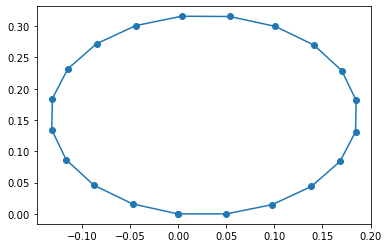

In [12]:
x1 = np.array([x[2 * i] for i in range(21)])
x2 = np.array([x[2 * i+1] for i in range(21)])
plt.plot(x1,x2, marker='o')

**Result#19.3a:** Using BFGS Method with randomly generated initial values, we found optimum value of $0.07892127927360262$ at point showing in the above results

In [13]:
# Maximum using gradient
np.random.seed(0)
x, t = np.random.randn(42), 10
x,x_tab=gradient2(f=f3, df=df3, x0=x, sign_min_max=-1, t=t, st=5000)

x_min = [-9.09019483e-04 -5.59702370e-04  2.42561686e-02 -3.50103272e-02
 -1.00105987e-01 -2.84249017e-01 -1.36906686e-01 -5.60392528e-01
 -8.20670319e-02 -8.33522331e-01  5.85551397e-02 -1.07410967e+00
  2.69728804e-01 -1.25602502e+00  5.28670461e-01 -1.35962751e+00
  8.07319743e-01 -1.37373115e+00  1.07581041e+00 -1.29687140e+00
  1.30523888e+00 -1.13742711e+00  1.47135818e+00 -9.12340072e-01
  1.55647778e+00 -6.45801508e-01  1.55178183e+00 -3.65602074e-01
  1.45789684e+00 -1.01671803e-01  1.28442790e+00  1.18968864e-01
  1.05004965e+00  2.72719086e-01  7.78257538e-01  3.44050491e-01
  4.98590752e-01  3.25275160e-01  2.38578530e-01  2.18055743e-01
  2.71543008e-02  3.42999082e-02] 	 f(x_opt) = 2.275522292651288 	 no_iter = 5000


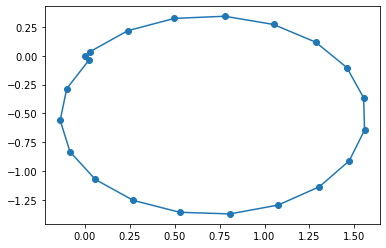

In [14]:
x1 = np.array([x[2 * i] for i in range(21)])
x2 = np.array([x[2 * i+1] for i in range(21)])
plt.plot(x1,x2,marker='o')

**Result#19.3b:** Using gradient Method with randomly generated initial values, we found optimum value of $2.275522292651288$ at point showing in the above results

### Problem 20.1) 
Consider the image below. You can think of it as $64 \times 64$ matrix written on the right.\
Denoise it, using $p=\mathrm{v}=1$, $\varepsilon=0.1$, and some appropriate value of $\lambda$.

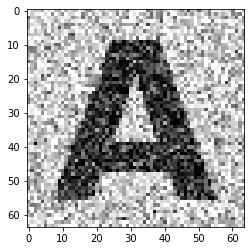

In [62]:
# Loading  and displaying the original image
mat = np.loadtxt("A051.txt")
plt.imshow(mat, cmap='gray')
# Padding the matrix image with 204 by both edge
mat2 = np.pad(mat,1, mode='constant', constant_values=204)

Considering the system of ODEs for the pixels' values which looks like

$$
m \frac{d^2 u_{\mathrm{v}}}{\mathrm{d} t^2}+\frac{\mathrm{d} u_{\mathrm{v}}}{\mathrm{d} t}=w_{\mathrm{v}}-u_{\mathrm{v}}-\lambda \sum_{\mathrm{v}^{\prime}} \frac{u_{\mathrm{v}}-u_{\mathrm{v}^{\prime}}}{\sqrt{\varepsilon^2+\left(u_{\mathrm{v}}-u_{\mathrm{v}^{\prime}}\right)^2}} \quad \text{ for all pixels } v
$$
where the summation over $v^{\prime}$ goes over the pixels neighboring the pixel $v$.

In [63]:
# Here we compute the right hand side of the above ODE
def f(u, w, lamda = 64, eps = 0.1):
    n = np.shape(u)[0]
    shift = np.array([-1,0,1])
    nbr_diff = np.zeros(u.shape)
    e = eps; L = lamda
    for i in range(1,n-1):
        for j in range(1, n-1):
            for i2 in shift:
                for j2 in shift:
                    if (abs(i2)==abs(j2)):
                        continue
                    du = u[i][j] - u[i+i2][j+j2]
                    nbr_diff[i][j] += du/np.sqrt(e**2+du**2)
    ret = w - u - L*nbr_diff
    return ret 

Using the explicit Runge-Kutta method (RK2), that is 

$$
\frac{d y}{d x}=f(y, x)
$$
the second order Runge-Kutta estimate for $y_{n+1}$ is given by
$$
\begin{aligned}
k_1 & =\Delta x f\left(y_n, x_n\right) \\
k_2 & =\Delta x f\left(y_n+\frac{k_1}{2}, x_n+\frac{\Delta x}{2}\right) \\
y_{n+1} & =y_n+k_2
\end{aligned}
$$
where $\Delta x=x_{n+1}-x_n$.

In [64]:
# Computing RK2
def RK2(f, u, w, lamda = 64, eps = 0.1):
    n = np.shape(u)[0]
    e = eps; L = lamda; F=f
    dx = 0.01; t=0
    while (t<100):
        k1 = F(u, w, L, e); t+=dx/2
        u = u + (dx/2)*k1; t+=dx/2
        k2 = f(u, w, L, e); t+=dx
        u = u + (dx/2)*k2; t+=1
    return u  

In [65]:
# with lambda = 16
u = mat2; w=mat2
res12 = RK2(f, u, w, lamda =16 , eps = 0.1)

In [66]:
# with lambda = 32
res13 = RK2(f, u, w, lamda =32 , eps = 0.1)

In [67]:
# with lambda = 64
res21 = RK2(f, u, w, lamda =64 , eps = 0.1) 

In [68]:
# with lambda = 128
res22 = RK2(f, u, w, lamda =128 , eps = 0.1)

In [69]:
# with lambda = 256
res23 = RK2(f, u, w, lamda =256 , eps = 0.1)

Text(0.5, 0, '$\\lambda = 256$')

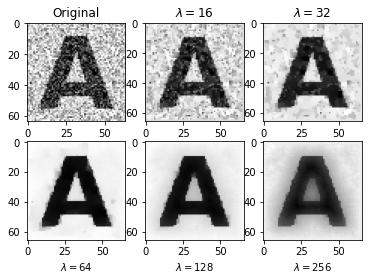

In [70]:
fig,  ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3)
ax11.imshow(mat, cmap='gray')
ax11.set_title(r"Original")
ax12.imshow(res12, cmap='gray')
ax12.set_title(r"$\lambda = 16$")
ax13.imshow(res13, cmap='gray')
ax13.set_title(r"$\lambda = 32$")
ax21.imshow(res21, cmap='gray')
ax21.set_xlabel(r"$\lambda = 64$")
ax22.imshow(res22, cmap='gray')
ax22.set_xlabel(r"$\lambda = 128$")
ax23.imshow(res23, cmap='gray')
ax23.set_xlabel(r"$\lambda = 256$")

**Result 20_1:** The above figure show the restoration of the original given noisy image with different value $\lambda$ of $ 16, 32, 64, 128,$ and $256$ from top left most after the original image to down right most respectively.

### Problem 21.1) 
Minimize the function $L_2(x, y)=(x-1)^2+(y-1)^2$ subject to $g = y^2+x^3 \leq 0$.\
From, 
$$
f_t(\boldsymbol{x}):=f(\boldsymbol{x})+\sum_i L_t\left(g_i(\boldsymbol{x})\right),
$$

where $L_t(g):=-(1 / t) \ln (-g).$\
Then
$$ 
\begin{aligned}
L_t(x, y) &= L_2(x, y) - \frac{1}{t}\ln(-g)\\
          &= (x-1)^2+(y-1)^2 - \frac{1}{t}\ln(-(y^2+x^3))
\end{aligned}
$$

In [56]:
# This is the gradient method adapted to the case of inequality constrainst using Barrier approach
def gradient4(f, df, x0, tee=10, alpha = 0.1, beta = 0.5, st=100 ):
    """
    Grdient Descent Metthod with Backtracking
    """
    T=tee; t=1; x=x0; x_tab=np.copy(x0)
    F = f; dF =df
    counter = 0
    while (T<1e+10):
        while ((LA.norm(dF(x,T)))>= 1e-4) and (counter<st): # Stoping criterial
            # Picking direction: gradient descent
            dx = -dF(x,T)
            # Line search : backtracking
            while ((F(x+t*dx,T)[0])>= (F(x,T)[0]+alpha*t*np.matmul(dF(x,T),dx))):
            #while ((x[0]+t*dx[0])**3 +(x[1]+t*dx[1])**2 >=0) or ((F(x+t*dx,T)[0])>= (F(x,T)[0]+alpha*t*np.matmul(dF(x,T),dx))):
                t =t*beta
            # Update x
            x = x + t*dx
            x_tab = np.vstack((x_tab,x))
            counter +=1
        T = 10*T
    print("x_min =",x,"\t", "f(x_min) =",F(x,T)[1],"\t no_iter =",counter)
    return x, x_tab

In [57]:
# Damped newton adapted to the case of Barrier approach
def damped_newton4(f, df, Hf, x0, sign_min_max = 1, tee=50, a=0.25, b=0.5, st=1000):
    """
    Damped newton method for finding optimum values
    """
    t=1; alpha=a; beta=b
    x=x0; x_tab=np.copy(x)
    F=f; dF=df; HF=Hf
    stop=st; counter2=0
    T =tee
    while (T< 2e+10):
        # Stoping criterial
        while (((LA.norm(df(x,T)))>= 1e-6*np.sqrt(T)) and counter2 < stop):
            # Picking direction: gradient descent
            dx = -np.linalg.solve(HF(x,T),dF(x,T))   #(np.matmul((inv(HF(x))),dF(x)))
            if np.dot(dx,dF(x,T))>0:
                dx=-dx 
            flag = 0
            # Line search : backtracking
            while ((F(x+t*dx,T)[0])>= (F(x,T)[0]+alpha*t*np.matmul(dF(x,T),dx))):
            #while ((x[0]+t*dx[0])**3 +(x[1]+t*dx[1])**2 >=0) or ((F(x+t*dx,T)[0])>= (F(x,T)[0]+alpha*t*np.matmul(dF(x,T),dx))):
                t =t*beta
                if (LA.norm(t*dx)< np.finfo(float).eps):
                    if (flag==1):
                        break
                    dx = -dF(x,T); flag=1
            # Update x
            x = x + t*dx
            x_tab = np.vstack((x_tab,x))
            counter2 +=1
        T = 10*T
    print("x_min =",x,"\t", "f(opt) =",F(x,T)[1],"\t no_iter =",counter2)
    return x, x_tab

In [58]:
# Definition of function and its gradients and Hessian
def Ft(X,t):
    x=X[0]; y=X[1]
    g = y**2 + x**3
    if (g >=0):
        return 1e+100,5
    Lt = (x-1)**2 + (y-1)**2
    ret = Lt -(1/t)*(np.log(-g))
    return ret, Lt

def dFt(X,t):
    x=X[0]; y=X[1]
    g = y**2 + x**3
    ret = np.array([2*(x-1) - (3/t)*((x**2)/g), 2*(y-1) - (2/t)*(y/g)])
    return ret

def HFt(X,t):
    x=X[0]; y=X[1]
    g = y**2 + x**3
    fxx = 2 + (3/t)*((x**4-2*x*y**2)/g**2)
    fxy = (6/t)*((x**2*y)/g**2)
    fyy = 2 - (2/t)*((x**3-y**2)/g**2)
    ret = np.array([[fxx,fxy],[fxy,fyy]])
    return ret

In [59]:
#Using gradient Method
x = np.array([-1,0])
x, x_tab=gradient4(f=Ft, df=dFt, x0=x, tee=10, alpha = 0.25, beta = 0.5, st=1000 )

x_min = [-1.58294361e-03  3.95224675e-06] 	 f(x_min) = 2.003160488462065 	 no_iter = 1000


In [60]:
# Using Damped Newton Method
x = np.array([-10,0])
x, x_tab = damped_newton4(f=Ft, df=dFt, Hf=HFt, x0=x, sign_min_max = 1, tee=100, a=0.25, b=0.5, st=10000)

x_min = [-1.54553557e-10  3.55036418e-20] 	 f(opt) = 2.000000000309107 	 no_iter = 1116


**Result#21.1:** Using gradient and Damped Newton method we found minimum value of $2.0$ at point (0,0) approximately, but Damped Newton method is faster than gradient method

### Problem 21.3)
$$
\begin{aligned}
D(X) & =\|X-p\|_2^2 ; X=(x, y, z), p=(3,2,1) \text {. implies } \\
& =(x-3)^2+(y-2)^2+(z-1)^2
\end{aligned}
$$
Therefore.
$$
\begin{aligned}
\operatorname{argmin}_X & D(X), \text { subject to } \\
& x \pm \varphi y \leq \pm \varphi^2 \\
& y \pm \varphi z \leq \pm \varphi^2 \\
& z \pm \varphi x \leq \pm \varphi^2.
\end{aligned}
$$

Following
$$f_t(\boldsymbol{x}):=f(\boldsymbol{x})+\sum_i L_t\left(g_i(\boldsymbol{x})\right),$$
where $L_t(g):=-(1 / t) \ln (-g)$

In [48]:
# This is the gradient method adapted to the case of 
# inequality constrainst using Barrier approach
def gradient5(f, df, x0, tee=10, sign_min_max=1, alpha = 0.1, beta = 0.5, st=1000 ):
    """
    Grdient Descent Metthod with Backtracking
    """
    T=tee; t=1; x=x0; x_tab=np.copy(x0)
    F = f; dF =df
    counter = 0
    while (T<1e+10):
        while ((LA.norm(dF(F,x,T)))>= 1e-8) and (counter< st): # Stoping criterial
            # Picking direction: gradient descent
            dx = -dF(F,x,T)
            # Line search : backtracking
            while (F(x+t*dx,T,sign_min_max)[2]>=0) or\
            ((F(x+t*dx,T,sign_min_max)[0])>= (F(x,T,sign_min_max)[0]+alpha*t*np.matmul(dF(F,x,T),dx))):
                t =t*beta
            # Update x
            x = x + t*dx
            x_tab = np.vstack((x_tab,x))
            counter +=1
        T = 10*T
    print("x_min =",x,"\t", "f(x_min) =",F(x,T)[1],"\t no_iter =",counter)
    return x, x_tab

In [49]:
# BFGS method adapted to the case of Barrier approach
def BFGS5(f, df, x0, sign_min_max=1, t=50, st=1000):
    x=x0; stop = st
    F = f(x,t,sign_min_max)[0]; dF = df(f,x,t,sign_min_max); counter = 0
    C = np.eye(len(x)); x_tab = np.copy(x)
    x_old= np.array([100,100])
    while (t<2.e+8):
        while (LA.norm(dF)>1.e-2/np.sqrt(t)) and counter < stop:
            d = -np.matmul(C,dF)
            if np.dot(d,dF)>0:
                d = -d
            while (f(x+d,t,sign_min_max)[2]>=0) or (f(x+d,t,sign_min_max)[0]>=F):
                d=0.2*d
                if (LA.norm(d)<1.11e-16):
                    C = np.eye(len(x))
                    d = -dF
            x_old = x
            x = x+d; F=f(x,t,sign_min_max)[0]; x_tab = np.vstack((x_tab,x))
            counter += 1
            new_dF = df(f,x,t,sign_min_max); g = new_dF - dF; dF = new_dF; I = np.eye(len(x)) 
            rho = 1/(np.matmul(g.T,d))
            tempA1 = np.outer(d,g); tempA2 = np.outer(g,d); tempA3 = np.outer(d,d)
            tempB1 = I - tempA1*rho; tempB2 = I - tempA2*rho; tempB3 = tempA3*rho;
            C = tempB1@C@tempB2 + tempB3
#             C = np.matmul(np.matmul(tempB1,C),tempB2) + tempB3
        t = t*10
    print("x_min =",x,"\t", "f(x_min) =",f(x,t)[1],"\t no_iter =",counter)
    return x, x_tab

In [50]:
# function definition
def Dt(X,t,sign_min_max=1):
    x=X[0]; y=X[1]; z=X[2]
    phi = (np.sqrt(5)+1)/2; phi_sq = phi + 1
    g11=x + phi*y - phi_sq; g12=x + phi*y + phi_sq; g13=x - phi*y - phi_sq ; g14=x - phi*y + phi_sq
    g21=y + phi*z - phi_sq; g22=y + phi*z + phi_sq; g23=y - phi*z - phi_sq; g24 =y - phi*z + phi_sq
    g31 =z + phi*x - phi_sq; g32=z + phi*x + phi_sq; g33=z - phi*x - phi_sq; g34=z - phi*x + phi_sq
    D = (x-3)**2 + (y-2)**2 + (z-1)**2
    ret = sign_min_max*D - (1/t)*(np.log(g11*g12*g13*g14*g21*g22*g23*g24*g31*g32*g33*g34))
    Max = np.max([g11, g13, g21]) #taking the feasiblity set
    return ret, D, Max

def dDt(func, x, t, sign_min_max=1, eps: float = 1e-8):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        dx = np.zeros_like(x)
        dx[i] = eps
        grad[i] = (func(x + dx, t,sign_min_max)[0] - func(x - dx, t,sign_min_max)[0]) / (2 * eps)
    return grad

# def dDt(func, x, t, sign_min_max = 1):
#     size = len(x)
#     df, I= np.zeros(size), np.eye(size)
#     d, flag = 1.e-5, 0
#      # starting d(elta) is about eps_machineˆ(1 / 3)
#     for i in range(size):       # checking all directions
#         while (func(x + d*I[:,i], t, sign_min_max)[2] >= 0.):
#             d, flag = d * 0.5, 1        # reduce d(elta) if step out of feasible region
#     if (flag == 1): d *= 0.02           # perturbed points were unfeasible
#     for i in range(size):
#         Fp, Fm = func(x + d * I[:, i], t,sign_min_max)[0], func(x - d * I[:, i], t, sign_min_max)[0]
#         df[i] = (Fp - Fm) / (2. * d)
#     return df

In [55]:
# Using BFGS method
x = np.array([0.2,0.1,0.2])
x,x_tab=BFGS5(f=Dt, df=dDt, x0=x, sign_min_max=1, t=10, st=100)

x_min = [1.53909779 0.40374202 0.55857821] 	 f(x_min) = 4.8771279806668515 	 no_iter = 5


/tmp/ipykernel_29870/274651881.py:9: RuntimeWarning: invalid value encountered in log
  ret = sign_min_max*D - (1/t)*(np.log(g11*g12*g13*g14*g21*g22*g23*g24*g31*g32*g33*g34))


**Result 23.3a:** Using BFGS method, we have minimum value at $4.8771279806668515$ at point $(1.53909779, 0.40374202, 0.55857821 )$

In [54]:
# Using gradient method    """This result is more accurate"""
x = np.array([0.2,0.1,0.2])
x, x_tab=gradient5(f=Dt, df=dDt, x0=x, tee=100, alpha = 0.1, beta = 0.5, st=5000 )

/tmp/ipykernel_29870/274651881.py:9: RuntimeWarning: invalid value encountered in log
  ret = sign_min_max*D - (1/t)*(np.log(g11*g12*g13*g14*g21*g22*g23*g24*g31*g32*g33*g34))


x_min = [1.34015362 0.78565048 0.44068571] 	 f(x_min) = 4.542567243777839 	 no_iter = 5000


**Result 23.3b:** Using gradient method, we have minimum value at $4.542567243777839$ at point $(1.34015362, 0.78565048, 0.44068571 )$

In [45]:
def dDt(func, x, t, sign_min_max = 1):
    size = len(x)
    df, I= np.zeros(size), np.eye(size)
    d, flag = 1.e-5, 0
     # starting d(elta) is about eps_machineˆ(1 / 3)
    for i in range(size):       # checking all directions
        while (func(x + d*I[:,i], t, sign_min_max)[2] >= 0.):
            print(func(x + d*I[:,i], t, sign_min_max)[2])
            d, flag = d * 0.5, 1        # reduce d(elta) if step out of feasible region
    if (flag == 1): d *= 0.02           # perturbed points were unfeasible
    for i in range(size):
        Fp, Fm = func(x + d * I[:, i], t,sign_min_max)[0], func(x - d * I[:, i], t, sign_min_max)[0]
        df[i] = (Fp - Fm) / (2. * d)
    return df
x, t = np.array([0.5,4,0.2]), 1
dDt(Dt, x, t, sign_min_max = 1)

4.354111966249684
4.3541069662496845
4.354104466249685
4.354103216249685
4.354102591249685
4.354102278749685
4.354102122499684
4.3541020443746845
4.354102005312185
4.354101985780934
4.3541019760153095
4.354101971132497
4.354101968691091
4.354101967470388
4.3541019668600365
4.35410196655486
4.354101966402273
4.354101966325978
4.354101966287832
4.354101966268758
4.354101966259221
4.354101966254453
4.354101966252069
4.354101966250877
4.354101966250281
4.354101966249983
4.354101966249834
4.354101966249759
4.354101966249722
4.354101966249703
4.354101966249694
4.354101966249689
4.354101966249687
4.354101966249686
4.354101966249686
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.354101966249685
4.35410196

KeyboardInterrupt: 

### Problem 21.4) 
The two-dimensional cross section of a water chamber is a region bounded above by the line $x=y$ and below by the circle $x^2+(y-2)^2=4$. Inside the chamber there are a float at $\left(x_1, y_1\right)$ and a weight at $\left(x_2, y_2\right)$ connected by a stick of length $\sqrt{2}$. Minimize $f_4\left(x_1, y_1, x_2, y_2\right)=3 y_2-2 y_1$ subject to $\left(x_1-x_2\right)^2+\left(y_1-y_2\right)^2=2$ and $g_m\left(x_n, y_n\right) \leq 0, m=1,2, n=1,2$; where $g_1(x, y)=y-x$ and $g_2(x, y)=x^2+y^2-4 y$.

Following
$$
f_{t, u}(x, y, z)=f_4(x, y, z)-\sum_i\ln (-g_i(x, y, z)) / t+u h^2(x, y, z),
$$

In [39]:
# This is the gradient method adapted to the case of equality 
# and inequality constrainst using Barrier approach
def gradient6(f, df, x0, tee=10, u=10, alpha = 0.1, beta = 0.5, st=100 ):
    """
    Grdient Descent Metthod with Backtracking
    """
    T=tee; t=1; x=x0; x_tab=np.copy(x0)
    F = f; dF =df
    counter = 0
    while (T<1e+14) and (u<1e+14):
        while ((LA.norm(dF(F,x,T,u)))>= 1e-8) and (counter < st): # Stoping criterial
            # Picking direction: gradient descent
            dx = -dF(F,x,T,u)
            # Line search : backtracking
            while ((F(x+t*dx,T,u)[2])>=0) or\
            ((F(x+t*dx,T,u)[0])>= (F(x,T,u)[0]+alpha*t*np.matmul(dF(F,x,T,u),dx))):
                t =t*beta
            # Update x
            x = x + t*dx
            x_tab = np.vstack((x_tab,x))
            counter +=1
        T = 10*T; u = 10*u
    print("x_min =",x,"\t", "f(x_min) =",F(x,T,u)[1],"\t no_iter =",counter)
    return x, x_tab

In [42]:
def f4_t(X,t,u):
    x1=X[0]; y1=X[1]; x2 = X[2]; y2=X[3]
    h= (x1-x2)**2 + (y1-y2)**2 -2
    g11=y1-x1
    g12=y2-x2
    g21=x1**2 + y1**2 -4*y1
    g22=x2**2 + y2**2 - 4*y2
    f4 = 3*y2 - 2*y1
    ft = f4 -(1/t)*(np.log(np.prod([-g11,-g12,-g21,-g22]))) + u*h**2
    Max = np.max([g11, g12, g21, g22]) #taking the feasiblity set
    return ft, f4, Max

# def df4_t(func, x, t, u, eps: float = 1e-8):
#     grad = np.zeros_like(x)
#     for i in range(len(x)):
#         dx = np.zeros_like(x)
#         dx[i] = eps
#         grad[i] = (func(x + dx, t, u)[0] - func(x - dx, t, u)[0]) / (2 * eps)
#     return grad

def df4_t(func, x, t, sign_min_max = 1):
    size = len(x)
    df, I= np.zeros(size), np.eye(size)
    d, flag = 1.e-5, 0
     # starting d(elta) is about eps_machineˆ(1 / 3)
    for i in range(size):       # checking all directions
        while (func(x + d*I[:,i], t, sign_min_max)[2] >= 0.):
            print("inner=",func(x + d*I[:,i], t, sign_min_max)[2])
            d, flag = d * 0.5, 1        # reduce d(elta) if step out of feasible region
    if (flag == 1): d *= 0.02           # perturbed points were unfeasible
    for i in range(size):
        Fp, Fm = func(x + d * I[:, i], t,sign_min_max)[0], func(x - d * I[:, i], t, sign_min_max)[0]
        df[i] = (Fp - Fm) / (2. * d)
    return df

In [43]:
# Using gradient method
x =  np.array([1.2, 1.1, 0.9, 0.8]) #np.array([0.2,0.1,0.2,0.1])
x, x_tab=gradient6(f=f4_t, df=df4_t, x0=x, tee=100, u=1000, alpha = 0.1, beta = 0.5, st=10000 )

/tmp/ipykernel_29870/2104038947.py:9: RuntimeWarning: invalid value encountered in log
  ft = f4 -(1/t)*(np.log(np.prod([-g11,-g12,-g21,-g22]))) + u*h**2


x_min = [1.43263567 1.41827508 0.77923382 0.16395095] 	 f(x_min) = -2.344697306304261 	 no_iter = 10000


**Result 21_4:** Using gradient method we found minimum value of $-2.344697306304261$ at point ( 1.43263567, 1.41827508, 0.77923382, 0.16395095 ).